In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

28it [00:00, 277.89it/s]

62it [00:00, 257.96it/s]

94it [00:00, 273.08it/s]

133it [00:00, 298.16it/s]

164it [00:00, 301.13it/s]

203it [00:00, 322.47it/s]

242it [00:00, 339.94it/s]

281it [00:00, 353.14it/s]

320it [00:00, 363.03it/s]

359it [00:01, 369.76it/s]

398it [00:01, 374.77it/s]

436it [00:01, 375.20it/s]

474it [00:01, 374.51it/s]

513it [00:01, 376.84it/s]

552it [00:01, 378.50it/s]

591it [00:01, 379.29it/s]

630it [00:01, 381.11it/s]

669it [00:01, 383.03it/s]

708it [00:01, 384.20it/s]

747it [00:02, 384.99it/s]

786it [00:02, 363.60it/s]

824it [00:02, 368.27it/s]

863it [00:02, 372.05it/s]

901it [00:02, 367.45it/s]

940it [00:02, 373.20it/s]

979it [00:02, 376.01it/s]

1018it [00:02, 379.18it/s]

1057it [00:02, 380.09it/s]

1096it [00:03, 377.46it/s]

1134it [00:03, 375.96it/s]

1172it [00:03, 375.52it/s]

1210it [00:03, 375.51it/s]

1248it [00:03, 361.42it/s]

1286it [00:03, 366.33it/s]

1324it [00:03, 369.51it/s]

1363it [00:03, 374.18it/s]

1401it [00:03, 371.98it/s]

1439it [00:03, 373.98it/s]

1477it [00:04, 368.43it/s]

1515it [00:04, 371.56it/s]

1554it [00:04, 375.20it/s]

1593it [00:04, 378.77it/s]

1632it [00:04, 381.89it/s]

1672it [00:04, 386.20it/s]

1712it [00:04, 390.02it/s]

1752it [00:04, 384.82it/s]

1792it [00:04, 387.60it/s]

1831it [00:04, 388.31it/s]

1871it [00:05, 389.17it/s]

1910it [00:05, 382.14it/s]

1949it [00:05, 384.17it/s]

1989it [00:05, 385.73it/s]

2029it [00:05, 387.10it/s]

2068it [00:05, 386.84it/s]

2107it [00:05, 350.69it/s]

2146it [00:05, 360.93it/s]

2183it [00:05, 361.30it/s]

2220it [00:06, 361.13it/s]

2259it [00:06, 367.40it/s]

2298it [00:06, 373.00it/s]

2337it [00:06, 376.22it/s]

2375it [00:06, 371.50it/s]

2413it [00:06, 373.80it/s]

2452it [00:06, 375.40it/s]

2491it [00:06, 377.09it/s]

2530it [00:06, 378.73it/s]

2569it [00:06, 379.80it/s]

2608it [00:07, 381.99it/s]

2647it [00:07, 380.36it/s]

2686it [00:07, 379.05it/s]

2725it [00:07, 379.36it/s]

2763it [00:07, 379.02it/s]

2802it [00:07, 380.56it/s]

2841it [00:07, 360.61it/s]

2879it [00:07, 364.61it/s]

2916it [00:07, 364.31it/s]

2955it [00:07, 370.96it/s]

2994it [00:08, 376.10it/s]

3033it [00:08, 379.88it/s]

3072it [00:08, 382.00it/s]

3111it [00:08, 380.01it/s]

3150it [00:08, 377.43it/s]

3188it [00:08, 375.52it/s]

3226it [00:08, 364.26it/s]

3263it [00:08, 354.50it/s]

3299it [00:08, 348.33it/s]

3336it [00:09, 353.29it/s]

3372it [00:09, 346.66it/s]

3411it [00:09, 358.08it/s]

3450it [00:09, 366.33it/s]

3487it [00:09, 361.53it/s]

3525it [00:09, 364.27it/s]

3563it [00:09, 366.01it/s]

3600it [00:09, 364.74it/s]

3639it [00:09, 371.48it/s]

3678it [00:09, 376.59it/s]

3718it [00:10, 380.94it/s]

3757it [00:10, 364.22it/s]

3797it [00:10, 371.67it/s]

3836it [00:10, 374.34it/s]

3875it [00:10, 377.78it/s]

3915it [00:10, 381.44it/s]

3954it [00:10, 381.69it/s]

3993it [00:10, 383.38it/s]

4032it [00:10, 385.05it/s]

4071it [00:10, 385.88it/s]

4110it [00:11, 386.91it/s]

4149it [00:11, 387.75it/s]

4189it [00:11, 388.44it/s]

4228it [00:11, 386.31it/s]

4267it [00:11, 387.40it/s]

4307it [00:11, 388.13it/s]

4346it [00:11, 388.26it/s]

4385it [00:11, 386.81it/s]

4424it [00:11, 387.38it/s]

4463it [00:11, 387.35it/s]

4502it [00:12, 388.01it/s]

4541it [00:12, 383.21it/s]

4580it [00:12, 382.49it/s]

4619it [00:12, 380.79it/s]

4658it [00:12, 376.84it/s]

4696it [00:12, 373.90it/s]

4734it [00:12, 367.07it/s]

4736it [00:12, 372.37it/s]


0it [00:00, ?it/s]

39it [00:00, 383.35it/s]

78it [00:00, 384.26it/s]

117it [00:00, 384.59it/s]

157it [00:00, 388.65it/s]

197it [00:00, 391.75it/s]

238it [00:00, 395.54it/s]

279it [00:00, 397.93it/s]

319it [00:00, 397.84it/s]

359it [00:00, 397.29it/s]

399it [00:01, 395.05it/s]

438it [00:01, 392.33it/s]

477it [00:01, 390.66it/s]

516it [00:01, 388.71it/s]

555it [00:01, 388.61it/s]

595it [00:01, 390.19it/s]

636it [00:01, 394.33it/s]

677it [00:01, 396.43it/s]

718it [00:01, 399.44it/s]

759it [00:01, 399.88it/s]

799it [00:02, 390.82it/s]

839it [00:02, 392.45it/s]

879it [00:02, 394.43it/s]

919it [00:02, 396.04it/s]

959it [00:02, 395.52it/s]

1001it [00:02, 400.24it/s]

1042it [00:02, 402.39it/s]

1083it [00:02, 393.00it/s]

1123it [00:02, 320.70it/s]

1163it [00:03, 339.55it/s]

1204it [00:03, 357.14it/s]

1245it [00:03, 371.25it/s]

1286it [00:03, 380.12it/s]

1326it [00:03, 384.55it/s]

1367it [00:03, 389.25it/s]

1407it [00:03, 382.40it/s]

1448it [00:03, 388.81it/s]

1489it [00:03, 393.32it/s]

1529it [00:03, 385.51it/s]

1571it [00:04, 394.07it/s]

1613it [00:04, 400.84it/s]

1655it [00:04, 405.10it/s]

1697it [00:04, 407.94it/s]

1738it [00:04, 408.26it/s]

1779it [00:04, 394.46it/s]

1819it [00:04, 378.21it/s]

1858it [00:04, 380.97it/s]

1900it [00:04, 389.67it/s]

1940it [00:05, 377.43it/s]

1978it [00:05, 375.22it/s]

2019it [00:05, 383.67it/s]

2060it [00:05, 389.46it/s]

2101it [00:05, 392.87it/s]

2142it [00:05, 395.40it/s]

2183it [00:05, 397.04it/s]

2225it [00:05, 401.28it/s]

2266it [00:05, 402.39it/s]

2307it [00:05, 396.76it/s]

2348it [00:06, 399.01it/s]

2388it [00:06, 387.80it/s]

2427it [00:06, 386.70it/s]

2468it [00:06, 392.68it/s]

2509it [00:06, 397.31it/s]

2550it [00:06, 400.83it/s]

2592it [00:06, 403.89it/s]

2633it [00:06, 405.36it/s]

2674it [00:06, 405.54it/s]

2716it [00:06, 406.85it/s]

2757it [00:07, 396.89it/s]

2798it [00:07, 399.93it/s]

2839it [00:07, 402.09it/s]

2880it [00:07, 403.64it/s]

2921it [00:07, 405.46it/s]

2962it [00:07, 405.98it/s]

3003it [00:07, 407.13it/s]

3044it [00:07, 407.65it/s]

3086it [00:07, 408.16it/s]

3127it [00:07, 407.90it/s]

3168it [00:08, 407.52it/s]

3209it [00:08, 408.03it/s]

3250it [00:08, 407.99it/s]

3291it [00:08, 399.06it/s]

3332it [00:08, 399.85it/s]

3373it [00:08, 402.16it/s]

3414it [00:08, 403.28it/s]

3456it [00:08, 405.44it/s]

3497it [00:08, 404.84it/s]

3538it [00:09, 208.07it/s]

3570it [00:09, 220.04it/s]

3611it [00:09, 255.10it/s]

3652it [00:09, 287.40it/s]

3691it [00:09, 310.54it/s]

3728it [00:09, 316.58it/s]

3764it [00:09, 326.09it/s]

3804it [00:10, 345.14it/s]

3841it [00:10, 328.88it/s]

3882it [00:10, 347.80it/s]

3919it [00:10, 295.98it/s]

3960it [00:10, 322.11it/s]

4001it [00:10, 344.04it/s]

4042it [00:10, 361.01it/s]

4084it [00:10, 375.02it/s]

4126it [00:10, 387.44it/s]

4168it [00:11, 395.13it/s]

4209it [00:11, 398.62it/s]

4250it [00:11, 397.46it/s]

4291it [00:11, 399.22it/s]

4332it [00:11, 398.29it/s]

4373it [00:11, 396.60it/s]

4414it [00:11, 399.34it/s]

4456it [00:11, 402.98it/s]

4498it [00:11, 405.68it/s]

4539it [00:11, 406.90it/s]

4580it [00:12, 383.22it/s]

4621it [00:12, 389.42it/s]

4662it [00:12, 394.66it/s]

4704it [00:12, 399.33it/s]

4736it [00:12, 379.95it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

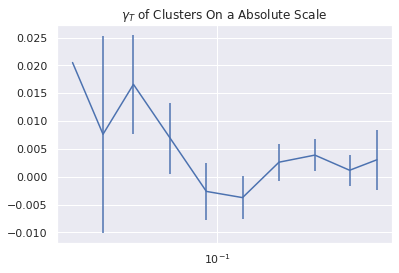

[-2.0512e-02 -1.8178e+00 -1.2864e+01 -9.2751e+00  6.0561e+00  1.5132e+01
 -1.5318e+01 -2.9833e+01 -9.0392e+00 -5.9647e+00]
------------------------------------------------------------------------------
[-4.1936e+00 -9.0309e+02 -2.6320e+03 -3.9039e+03 -5.6254e+03 -7.9541e+03
 -8.7285e+03 -7.8282e+03 -4.3770e+03 -4.0717e+02]
------------------------------------------------------------------------------
[1.000e+00 2.380e+02 7.750e+02 1.339e+03 2.304e+03 4.042e+03 5.856e+03
 7.670e+03 7.738e+03 1.955e+03]
------------------------------------------------------------------------------
[-0.0205 -0.0076 -0.0166 -0.0069  0.0026  0.0037 -0.0026 -0.0039 -0.0012
 -0.0031]
------------------------------------------------------------------------------
[-4.1936 -3.7945 -3.3961 -2.9155 -2.4416 -1.9679 -1.4905 -1.0206 -0.5657
 -0.2083]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

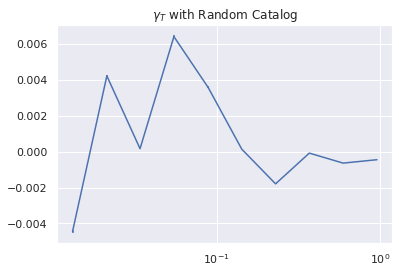

[-4.4456e-03  4.2334e-03  1.7211e-04  6.4249e-03  3.5935e-03  1.4591e-04
 -1.7898e-03 -7.3651e-05 -6.3221e-04 -4.4259e-04]
[ 6.4598e-05 -6.1516e-05 -2.5009e-06 -9.3360e-05 -5.2216e-05 -2.1202e-06
  2.6007e-05  1.0702e-06  9.1867e-06  6.4312e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

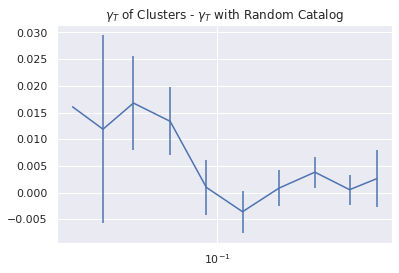

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

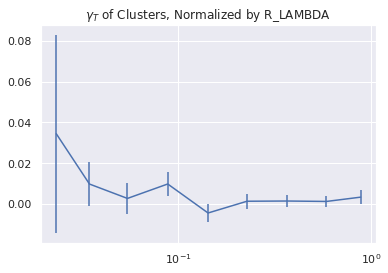

[  0.      -1.4482  -5.285   -2.9439 -17.6837  13.1299  -7.4457 -11.2537
 -11.7957 -18.2183]
------------------------------------------------------------------------------
[    0.      -157.7881 -1791.3528 -2965.7043 -4317.5704 -6032.252
 -7308.3494 -6999.8986 -4441.3485  -643.3478]
------------------------------------------------------------------------------
[   0.   42.  533. 1020. 1779. 3101. 4935. 6970. 8350. 5188.]
------------------------------------------------------------------------------
[    nan -0.0345 -0.0099 -0.0029 -0.0099  0.0042 -0.0015 -0.0016 -0.0014
 -0.0035]
------------------------------------------------------------------------------
[    nan -3.7569 -3.3609 -2.9076 -2.427  -1.9453 -1.4809 -1.0043 -0.5319
 -0.124 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)